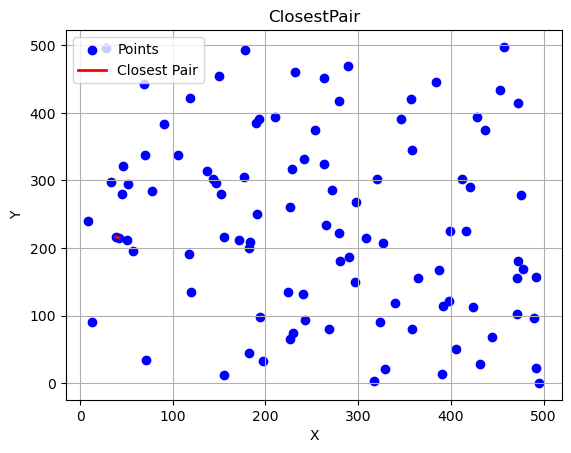

Brute Force방법 : 163737 Ticks, 163.73729999941133 ms


In [33]:
import random
import math
import matplotlib.pyplot as plt
import time

class ClosestPair:

    #점 랜덤 위치에 생성하기
    def points(num_points, width=500, height=500):
        return [(random.uniform(0, width), random.uniform(0, height)) for _ in range(num_points)]

    #brute_force방법
    def brute_force(points):
        min_dist = float('inf')
        closest_pair = None
        n = len(points)
        for i in range(n):
            for j in range(i + 1, n):
                dist = ClosestPair.dist(points[i], points[j])
                if dist < min_dist:
                    min_dist = dist
                    closest_pair = (points[i], points[j])
        return closest_pair, min_dist

    #점 거리 계산
    def dist(p1, p2):
        return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

    #점 찍기
    def plot_points(points, closest_pair=None):
        x_values = [p[0] for p in points]
        y_values = [p[1] for p in points]
        
        # 점들 그리기
        plt.scatter(x_values, y_values, color='blue', label='Points')
        
        # 최근접 점 쌍을 빨간 선으로 연결
        if closest_pair:
            p1, p2 = closest_pair
            plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='red', linewidth=2, label='Closest Pair')
        
        plt.title('ClosestPair')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.grid(True)
        plt.show()

# 포인트 생성
points = ClosestPair.points(100)

start_time = time.perf_counter()
# 최근접 점 쌍 찾기 (브루트포스 방법)
closest_pair, min_dist = ClosestPair.brute_force(points)

# 포인트와 가장 가까운 점 쌍 표시
ClosestPair.plot_points(points, closest_pair)
end_time = time.perf_counter()

#시간 계산
elapsed_time = end_time - start_time
elasped_ticks = int(elapsed_time * 1e6)

result = f"{elasped_ticks} Ticks, {elapsed_time * 1000} ms"
print("Brute Force방법 : " + result)

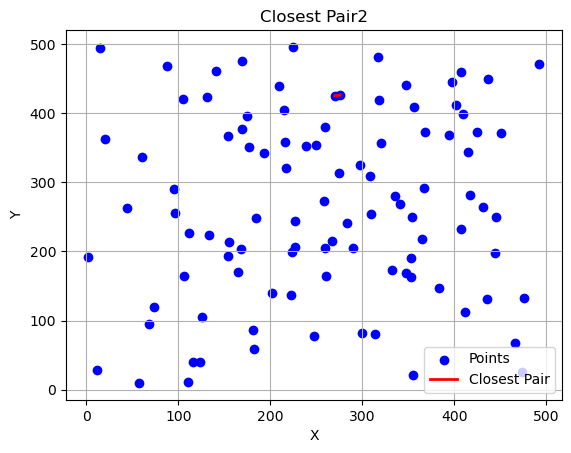

Dvided and Conquer방법 : 103547 Ticks, 103.54709999955958 ms


In [38]:
import random
import math
import matplotlib.pyplot as plt

class ClosestPair2:
    #랜덤 점 찍기
    def points(num_points, width=500, height=500):
        return [(random.uniform(0, width), random.uniform(0, height)) for _ in range(num_points)]

    #거리 계산
    def dist(p1, p2):
        return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

    def divide_and_conquer(points):
        points.sort(key=lambda p: p[0])  # X축 기준으로 정렬
        return ClosestPair2.dc(points)

    def dc(points):
        n = len(points)
        if n <= 3:  # 점의 개수가 3개 이하면 거리를 계산하여 최소값 반환
            return ClosestPair2.find_closest_pair(points)

        #분할 시작
        mid = n // 2
        left_half = points[:mid] #left부터 mid까지
        right_half = points[mid:] #mid부터 right까지

        #분할 시작
        (p1_left, p2_left), dist_left = ClosestPair2.dc(left_half)
        (p1_right, p2_right), dist_right = ClosestPair2.dc(right_half)

        # 좌우 중 최소 거리
        if dist_left < dist_right:
            min_dist = dist_left
            min_pair = (p1_left, p2_left)
        else:
            min_dist = dist_right
            min_pair = (p1_right, p2_right)

        # 중앙에 걸친 점들에 대한 최소 거리 확인
        mid_x = points[mid][0]
        in_strip = [p for p in points if abs(p[0] - mid_x) < min_dist]

        in_strip.sort(key=lambda p: p[1])  # Y축 기준으로 정렬

        for i in range(len(in_strip)):
            for j in range(i + 1, min(i + 7, len(in_strip))):
                dist = ClosestPair2.dist(in_strip[i], in_strip[j])
                if dist < min_dist:
                    min_dist = dist
                    min_pair = (in_strip[i], in_strip[j])

        return min_pair, min_dist

    @staticmethod
    def find_closest_pair(points):
        min_dist = float('inf')
        closest_pair = None
        for i in range(len(points)):
            for j in range(i + 1, len(points)):
                dist = ClosestPair2.dist(points[i], points[j])
                if dist < min_dist:
                    min_dist = dist
                    closest_pair = (points[i], points[j])
        return closest_pair, min_dist

    @staticmethod
    def plot_points(points, closest_pair=None):
        x_values = [p[0] for p in points]
        y_values = [p[1] for p in points]

        # 점들 그리기
        plt.scatter(x_values, y_values, color='blue', label='Points')

        # 최근접 점 쌍을 빨간 선으로 연결
        if closest_pair:
            p1, p2 = closest_pair
            plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='red', linewidth=2, label='Closest Pair')

        plt.title('Closest Pair2')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.grid(True)
        plt.show()

# 포인트 생성
points = ClosestPair2.points(100)


start_time = time.perf_counter()

# 분할 정복 알고리즘으로 최근접 점 쌍 찾기
closest_pair, min_dist = ClosestPair2.divide_and_conquer(points)

# 포인트와 가장 가까운 점 쌍 표시
ClosestPair2.plot_points(points, closest_pair)
end_time = time.perf_counter()

#시간 계산
elapsed_time = end_time - start_time
elasped_ticks = int(elapsed_time * 1e6)
result = f"{elasped_ticks} Ticks, {elapsed_time * 1000} ms"
print("Dvided and Conquer방법 : " + result)